<a href="https://colab.research.google.com/github/petrolau/covid-19-chestxray/blob/main/Covid_19_chestxray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<h1>Projeto utilizado -><h1/>**

https://github.com/ieee8023/covid-chestxray-dataset


**Torch XRay Vision =>** A library for chest X-ray datasets and models. Including pre-trainined models.

In [ ]:
pip install torchxrayvision


**Patologias inclusas:**

```
xrv.datasets.default_pathologies 

['Atelectasis',
 'Consolidation',
 'Infiltration',
 'Pneumothorax',
 'Edema',
 'Emphysema',
 'Fibrosis',
 'Effusion',
 'Pneumonia',
 'Pleural_Thickening',
 'Cardiomegaly',
 'Nodule',
 'Mass',
 'Hernia',
 'Lung Lesion',
 'Fracture',
 'Lung Opacity',
 'Enlarged Cardiomediastinum']
```




Para testar a reprodutibilidade da biblioteca, vamos utilizar as seguints imagem:
https://raw.githubusercontent.com/mlmed/torchxrayvision/master/tests/covid-19-pneumonia-58-prior.jpg

https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/images/000001-18.jpg

In [ ]:
!wget https://github.com/mlmed/torchxrayvision/blob/master/tests/covid-19-pneumonia-58-prior.jpg?raw=true -O image1.jpg

In [ ]:
!wget https://raw.githubusercontent.com/ieee8023/covid-chestxray-dataset/master/images/000001-18.jpg -O image2.jpg

OpenCV possui módulos de:
Processamento de Imagens e Video I/O, Estrutura de dados, Álgebra Linear, GUI (Interface Gráfica do Usuário) Básica com sistema de janelas independentes, Controle de mouse e teclado, além de mais de 350 algoritmos de Visão computacional como: Filtros de imagem, calibração de câmera, reconhecimento de objetos, análise estrutural e outros. O seu processamento é em tempo real de imagens.

In [ ]:
import torch
import cv2

from PIL import Image
from torchvision.transforms import ToTensor
from torchvision import models, transforms, utils

import torchxrayvision as xrv

# This model has every output trained. 
model = xrv.models.DenseNet(weights = "all")

# Composes several transforms together.
data_transforms = transforms.Compose([    
    transforms.Resize( (224, 224) ),
    # Pega a imagem de entrada e tranforma-a em um tensor para ser apresentado.
    transforms.ToTensor(),
])

# Carregando e tratando a imagem para testar no modelo.
img_path="image1.jpg"
raw_image = cv2.imread(img_path )
# cv2.cvtColor() retorna um array numpy
raw_image = cv2.cvtColor(raw_image, cv2.COLOR_BGR2GRAY)
# ... acessa todos os dados da imagem, -1 acessa o ultimo canal.
raw_image[..., ::-1]
im_pil = Image.fromarray(raw_image)
# Adicionando uma dimensao ao tensor
img = data_transforms(im_pil).unsqueeze(0)

# img.shape = retorna o número de linhas e colunas, já que a imagem está em grayscale. -> Não entedo o resultado
#print( "shape", img.shape )

# efetuando a pred. com o modelo model
pred = model(img)

print("==============================================================")
print(model.pathologies)
print("==============================================================")
print(pred.shape)
print("==============================================================")

# verificando se uma dessas patologias se enquadra na imagem.
print("Index da Pneumonia: ", model.pathologies.index("Pneumonia") )
print("Index da Cardiomegalia: ", model.pathologies.index("Cardiomegaly") )

# checando a pred.
print ("A predição é: ",pred)
# O que está sendo feito aqui?
pred = pred[:, model.pathologies.index("Pneumonia")]
pred = model(img)[:,model.pathologies.index("Cardiomegaly")]

print("A predição após as operações acima: ", pred)

Raw image shape:  (2373, 2373)
Np image shape:  (1, 224, 224)


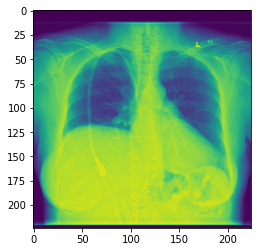

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# transformando em numpy array
npimg = img.numpy()[0]

# O que acontece de uma para outra?
print("Raw image shape: ", raw_image.shape )
print("Np image shape: ", npimg.shape )

# exibe a imagem, porém precisa de reshape
plt.imshow( npimg.reshape(224,224) )
